In [37]:
import numpy as np
import pandas as pd
from pylab import plot
from sklearn.cluster import KMeans

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import plot,iplot

In [34]:
df= pd.read_csv("./downloads/StartUpsESG_0602.csv")
df.head()

,id,StartUp,Country,Year,ESG,E,S,G,Raised,distr_tk,...,FISCALFRD,FINACIFRD,FOREIGINVEST,FOREIGDP,INTERPAY,percmath,GINI,MAKTEFF,PERCTECH,DEVCOUNT
0,12316,VenusEnergy,Lithuania,2018,0.010,0.008,0.002,0.000,5986183.0,0.27,...,96.7,70,1.299842e+09,2.420713,3.476571,4.26941,35.7,4.642995,3.11263,1
1,23416,GreenEnergyCoin,Netherlands,2018,0.018,0.010,0.006,0.002,0.0,0.00,...,88.2,80,-3.614670e+11,-39.565294,2.264509,6.37706,28.1,5.408080,2.82506,1
2,1553,HydroMiner,Austria,2017,0.014,0.010,0.000,0.004,3500000.0,0.00,...,81.1,70,-2.855524e+10,-6.277635,3.644302,6.07867,30.8,4.897589,4.38647,1
3,17028,PowerCorp,"Hong Kong SAR, China",2018,0.008,0.006,0.000,0.002,0.0,0.00,...,100.0,90,9.703626e+10,26.828457,0.050000,0.00000,0.0,5.705542,0.00000,1
4,8483,Emyron Coin,United States,2018,0.017,0.000,0.011,0.006,0.0,0.28,...,54.8,80,2.614820e+11,1.268600,11.816379,7.20920,41.4,5.209139,3.78213,1


In [35]:
data = df[['Raised','ESG', 'E', 'S', 'G']]

# Normalize only the 'Raised' column
raised_normalized = (df['Raised'] - df['Raised'].mean()) / df['Raised'].std()

# Create a new DataFrame with the normalized 'Raised' column and the other columns unchanged
data_normalized_raised = pd.concat([raised_normalized, df[['ESG', 'E', 'S', 'G']]], axis=1)

data_array = data_normalized_raised.to_numpy()

# Performing K-means clustering
kmeans = KMeans(n_clusters=18, random_state=0, n_init="auto").fit(data_array)

# Predicting the cluster labels for each data point
clusters = kmeans.predict(data_array)

# Adding cluster labels to the original DataFrame
df_with_id = df.copy()
df_with_id['Cluster'] = clusters


In [36]:
# Adicionando os rótulos de cluster ao array numpy
data_with_clusters = np.column_stack((data_array, clusters))

# Criando um gráfico de dispersão 3D para visualizar os clusters
trace = go.Scatter3d(
    x=data_with_clusters[:, 0],  # Coluna E
    y=data_with_clusters[:, 1],  # Coluna S
    z=data_with_clusters[:, 2],  # Coluna G
    mode='markers',
    marker=dict(
        color=clusters,  # Cores com base nos clusters
        size=8,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

# Criando layout
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(title='E'),
        yaxis=dict(title='S'),
        zaxis=dict(title='G')
    )
)

# Criando figura
fig = go.Figure(data=[trace], layout=layout)

# Plotando o gráfico
plot(fig, filename='cluster_plot.html')
# iplot(fig)

'cluster_plot.html'

In [39]:
# Adicionando os rótulos de cluster ao array numpy
data_with_clusters = np.column_stack((data_array, clusters))

# Criar um gráfico de dispersão 2D para visualizar os clusters
trace = go.Scatter(
    x=data_with_clusters[:, 0],  # Coluna Raised
    y=data_with_clusters[:, 1],  # Coluna ESG
    mode='markers',
    marker=dict(
        color=clusters,  # Cores com base nos clusters
        size=8,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

# Criar layout
layout = go.Layout(
    title='Clusters - Kmeans',
    xaxis=dict(title='Raised'),
    yaxis=dict(title='ESG')
)

# Criar figura
fig = go.Figure(data=[trace], layout=layout)

# Plotar o gráfico
# plot(fig, filename='kmeans_cluster_plot_2d.html')
iplot(fig)

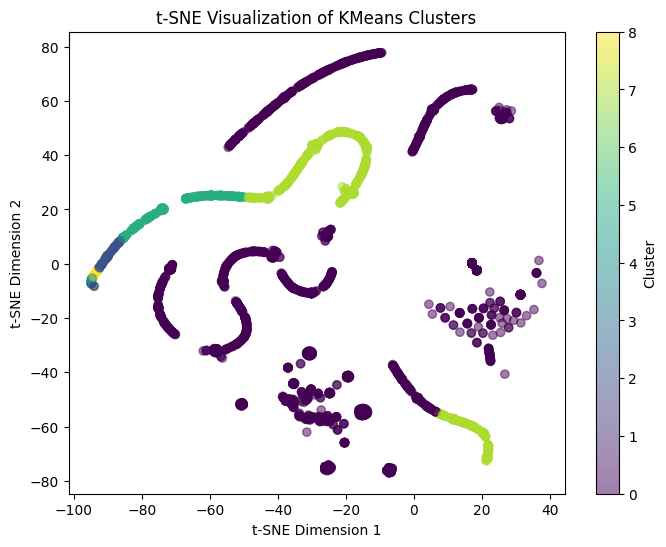

In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
data_tsne = tsne.fit_transform(data_array)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of KMeans Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


In [40]:
his = [0] * 9

for l in kmeans.labels_:
    his[l] += 1

In [42]:
his

[5686, 1, 70, 5, 12, 208, 2, 538, 19]

In [41]:
for i,h in enumerate(his):
    if h == 0:
        print(i)

In [15]:
# kmeans.predict(data)

/home/natanael/anaconda3/envs/topicos_bd/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)